# SVM >> support vector machines

## SVC >> support vector classifier

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [218]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [231]:
df=pd.DataFrame(X,columns=['x1','x2'])

In [232]:
df

,x1,x2
0,1.037327,-1.479385
1,0.882251,-0.037000
2,0.888618,1.253295
3,1.462218,-0.358984
4,-0.312948,1.107082
...,...,...
995,-0.083217,0.083707
996,1.608037,-1.476321
997,0.157417,1.232024
998,-0.295073,-0.225558


In [221]:
X.shape

(1000, 2)

In [222]:
y.shape

(1000,)

In [214]:
import seaborn as sns

In [235]:
import plotly.express as ex

ex.scatter_3d(df,x=df['x1'],y=df['x2'],z=y,color=y)

<Axes: xlabel='x1', ylabel='x2'>

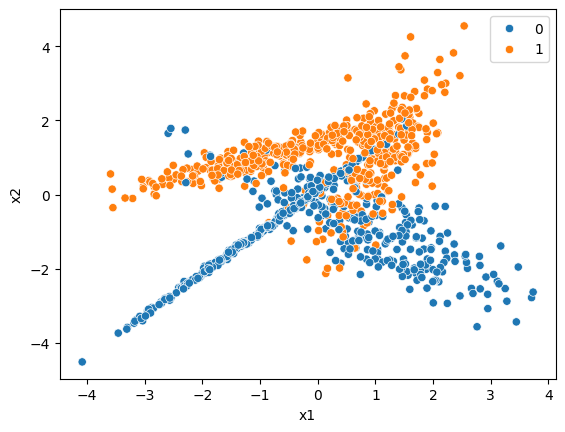

In [237]:
sns.scatterplot(df,x=df['x1'],y=df['x2'],color=y,hue=y)

In [160]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [161]:
X_test.shape

(300, 2)

In [162]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear')

In [163]:
classifier

SVC(kernel='linear')

In [164]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [165]:
y_ped=classifier.predict(X_test)

In [166]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [167]:
print(confusion_matrix(y_test,y_ped))
print(accuracy_score(y_test,y_ped))
print(classification_report(y_test,y_ped))

[[125  10]
 [ 10 155]]
0.9333333333333333
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       135
           1       0.94      0.94      0.94       165

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [168]:
#hyperparameter tuning with SVC

from sklearn.model_selection import GridSearchCV
params = {'C': [0.1, 0.2, 1, 2, 3, 10, 50, 100],
         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
         'kernel': ['linear','poly','rbf']}


In [169]:
grid=GridSearchCV(SVC(),param_grid=params,cv=5,verbose=3)

In [170]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.957 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.950 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.907 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.950 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.921 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.929 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.950 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.864 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.943 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rb

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 1, 2, 3, 10, 50, 100],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=3)

In [171]:
grid.best_params_

{'C': 50, 'gamma': 1, 'kernel': 'rbf'}

In [172]:
grid.best_score_

np.float64(0.9585714285714285)

In [173]:
grid.best_estimator_

SVC(C=50, gamma=1)

In [174]:
y_grid_pred=grid.predict(X_test)

In [175]:
print(confusion_matrix(y_test,y_grid_pred))
print(accuracy_score(y_test,y_grid_pred))
print(classification_report(y_test,y_grid_pred))

[[126   9]
 [  8 157]]
0.9433333333333334
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       135
           1       0.95      0.95      0.95       165

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



# SVR >> support verctor Regresson

In [176]:
from sklearn.datasets import make_regression

In [177]:
X,y=make_regression(n_samples=1000,n_features=2,noise=0.2,n_targets=1)

In [178]:
X

array([[-1.41449855,  0.74190994],
       [ 0.95125411,  2.256324  ],
       [ 0.07596104,  0.6018537 ],
       ...,
       [ 1.14667376, -0.04730945],
       [-0.17490435, -0.33927779],
       [-1.02295283,  1.68684285]])

In [179]:
y

array([-6.81976771e+01,  4.62274266e+01,  3.76356908e+00, -2.34135353e+01,
        1.29201033e+01, -3.49733889e+01,  4.54153254e+01,  6.95208455e+00,
       -2.73757131e+01,  8.45043285e+01, -1.11304960e+02, -1.12271356e+01,
        5.63450494e+01, -5.61569441e+01, -1.91997131e+01, -4.56342637e+01,
       -1.89424693e+01,  3.49350982e+00,  7.83470450e+01, -3.44166339e+01,
       -1.50170757e+01,  1.47832054e+01,  1.75223363e+01, -6.34021134e+01,
        1.17550638e+02, -3.05065188e+01, -2.95806360e+01,  4.43582178e+01,
       -4.39437242e+01, -2.82670810e+01, -2.59695883e+01, -8.76009819e+01,
       -5.27023031e+00, -4.23110579e+01,  4.36321129e+01, -1.53105191e+01,
        1.25920247e+01, -3.72766906e+01, -2.04409288e+01,  2.18214756e+01,
        2.44067828e+01, -3.95838615e+01, -9.43840099e+01, -1.20676345e+01,
       -2.37870666e+01, -4.35800860e+01, -3.54578178e+00, -8.22472870e+01,
        2.26776355e+01,  3.92886898e+01, -8.00421574e+01,  2.30492139e+01,
       -3.89944207e+01, -

In [180]:
y.shape

(1000,)

<Axes: xlabel='0', ylabel='1'>

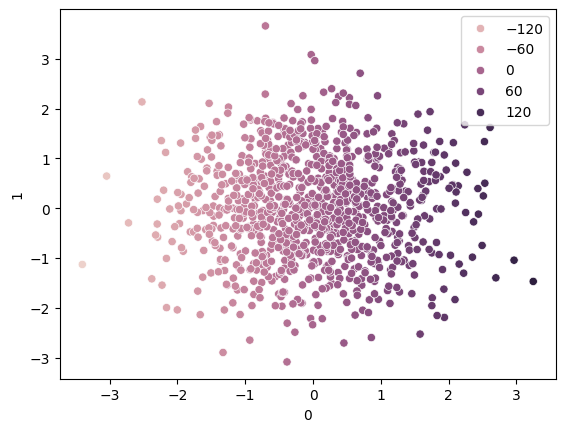

In [181]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [183]:
from sklearn.svm import SVR

In [184]:
regression=SVR(kernel='linear')

In [185]:
regression.fit(X_train,y_train)

SVR(kernel='linear')

In [186]:
y_pred=regression.predict(X_test)

In [187]:
from sklearn.metrics import r2_score,mean_absolute_error

In [188]:
print(r2_score(y_test,y_pred))

0.9999851123881828


In [189]:
#hyperparameter tuning with SVC

from sklearn.model_selection import GridSearchCV
params = {'C': [0.1, 0.2, 1, 2, 3, 10, 50, 100],
         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
         'kernel': ['linear','rbf','poly'],
         'epsilon':[0.1]}


In [190]:
grid=GridSearchCV(SVR(),param_grid=params,cv=5,verbose=3)

In [191]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.985 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.984 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=rbf;, score=0.151 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=rbf;, score=0.151 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=rbf;, score=0.193 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=rbf;, score=0.160 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=rbf;, score=0.192 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=poly;, score=

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 0.2, 1, 2, 3, 10, 50, 100],
                         'epsilon': [0.1], 'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

In [192]:
grid.best_estimator_

SVR(C=10, gamma=1, kernel='linear')

In [193]:
r2_score(y_test,grid.predict(X_test))

0.9999857279354343